In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Load statsbomb data
# https://github.com/statsbomb/open-data

matches = pd.read_csv('matches_statsbomb.csv')

In [7]:
# Lists of team names for top3 and rest
teams = matches['home_team.home_team_name'].value_counts().index.tolist()
top3_list = teams[:2] + teams[3:4]
rest_list = teams[2:3] + teams[4:]

In [8]:
# Classify top3 and rest
matches['ci_id'] = None
for teams in matches.itertuples():
    if teams[16] in top3_list:
        matches['ci_id'][teams[0]] = 'top3'
    else:
        matches['ci_id'][teams[0]] = 'rest'

In [9]:
top3_home = matches[matches['ci_id'] == 'top3']['home_score']
top3_away = matches[matches['ci_id'] == 'top3']['away_score']

rest_home = matches[matches['ci_id'] == 'rest']['home_score'] 
rest_away = matches[matches['ci_id'] == 'rest']['away_score']

Text(0.5, 1.0, 'Rest goals: home vs away')

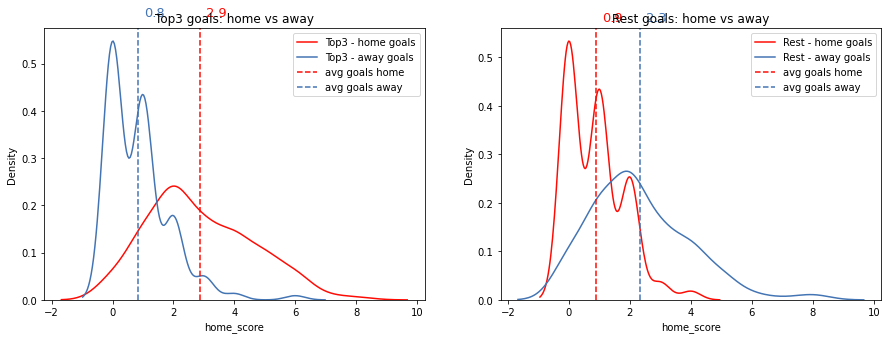

In [10]:
# Let's visualise all goals

# Set palette colors
colors = ["#FF0B04", "#4374B3"]
sns.set_palette(sns.color_palette(colors))

# Setting sizes and subplots
figsize = (15, 5)
f, (ax1, ax2) = plt.subplots(figsize=figsize, ncols=2)

# Plotting kdeplots
sns.kdeplot(top3_home, ax=ax1, label='Top3 - home goals')
sns.kdeplot(top3_away, ax=ax1, label='Top3 - away goals')
sns.kdeplot(rest_home, ax=ax2, label='Rest - home goals')
sns.kdeplot(rest_away, ax=ax2, label='Rest - away goals')

# Adding mean lines
ax1.axvline(top3_home.mean(), color='#FF0B04', linestyle='--', label='avg goals home')
ax1.axvline(top3_away.mean(), color='#4374B3', linestyle='--', label='avg goals away')

ax2.axvline(rest_home.mean(), color='#FF0B04', linestyle='--', label='avg goals home')
ax2.axvline(rest_away.mean(), color='#4374B3', linestyle='--', label='avg goals away')

# Adding legend
ax1.legend()
ax2.legend()

# Adding text with mean values
ax1.text(top3_home.mean() + 0.20, 0.60, str(round(top3_home.mean(), 1)), color='#FF0B04', fontsize=13)
ax1.text(top3_away.mean() + 0.20, 0.60, str(round(top3_away.mean(), 1)), color='#4374B3', fontsize=13)

ax2.text(rest_home.mean() + 0.20, 0.575, str(round(rest_home.mean(), 1)), color='#FF0B04', fontsize=13)
ax2.text(rest_away.mean() + 0.20, 0.575, str(round(rest_away.mean(), 1)), color='#4374B3', fontsize=13)

#Adding title
ax1.set_title('Top3 goals: home vs away')
ax2.set_title('Rest goals: home vs away')

In [11]:
# Visualising differences between home and away scores
print(matches.groupby('ci_id').agg({'home_score': [np.mean, np.std, np.size]}))
print()
print(matches.groupby('ci_id').agg({'away_score': [np.mean, np.std, np.size]}))

      home_score               
            mean       std size
ci_id                          
rest    0.877358  0.920569  212
top3    2.871795  1.721953  273

      away_score               
            mean       std size
ci_id                          
rest    2.320755  1.623566  212
top3    0.846154  1.006484  273


Text(0.5, 1.0, 'Goals away')

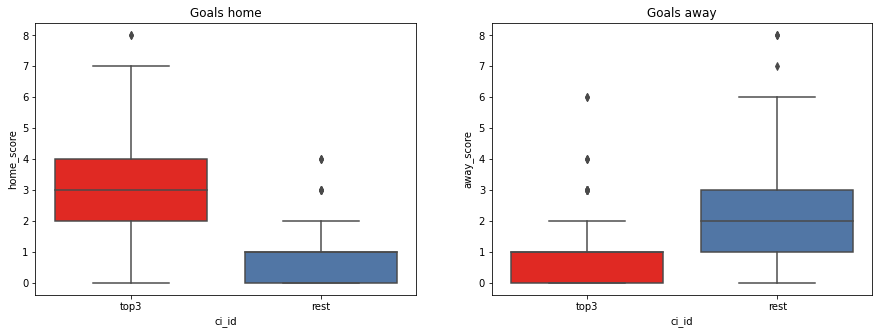

In [12]:
# Plotting boxplots to see check variance between samples
figsize = (15, 5)
f, (ax1, ax2) = plt.subplots(figsize=figsize, ncols=2)

sns.boxplot(x='ci_id', y='home_score', data=matches, ax=ax1)
sns.boxplot(x='ci_id', y='away_score', data=matches, ax=ax2)

ax1.set_title('Goals home')
ax2.set_title('Goals away')

In [13]:
# Because variances are not equal between samples, the unpooled approach was used
# Read here for more info: https://online.stat.psu.edu/stat500/lesson/7/7.3/7.3.1/7.3.1.2

best_estimate_home = matches[matches['ci_id'] == 'top3']['home_score'].mean() - matches[matches['ci_id'] == 'rest']['home_score'].mean()
best_estimate_away = matches[matches['ci_id'] == 'top3']['away_score'].mean() - matches[matches['ci_id'] == 'rest']['away_score'].mean()

sample_mean_diff_goals_home_top3 = matches[matches['ci_id'] == 'top3']['home_score'].std()
sample_mean_diff_goals_home_rest = matches[matches['ci_id'] == 'rest']['home_score'].std()

sample_mean_diff_goals_away_top3 = matches[matches['ci_id'] == 'top3']['away_score'].std()
sample_mean_diff_goals_away_rest = matches[matches['ci_id'] == 'rest']['away_score'].std()

n_top3 = matches[matches['ci_id'] == 'top3'].shape[0]
n_rest = matches[matches['ci_id'] == 'rest'].shape[0]

t_mult = 1.972

estimated_standard_error_home = np.sqrt((sample_mean_diff_goals_home_top3**2/n_top3)+(sample_mean_diff_goals_home_rest**2/n_rest))
estimated_standard_error_away = np.sqrt((sample_mean_diff_goals_away_top3**2/n_top3)+(sample_mean_diff_goals_away_rest**2/n_rest))

lower_bound_home = best_estimate_home - t_mult * estimated_standard_error_home
upper_bound_home = best_estimate_home + t_mult * estimated_standard_error_home 

lower_bound_away = best_estimate_away - t_mult * estimated_standard_error_away
upper_bound_away = best_estimate_away + t_mult * estimated_standard_error_away 

print("With 95% confidence, the difference in mean home goals between the top3 teams and the rest of teams in LaLiga is estimated to be between " + str(round(lower_bound_home, 1)) + " and " + str(round(upper_bound_home, 1)))
print()
print("With 95% confidence, the difference in mean away goals between the top3 teams and the rest of teams in LaLiga is estimated to be between " + str(round(lower_bound_away, 1)) + " and " + str(round(upper_bound_away, 1)))

With 95% confidence, the difference in mean home goals between the top3 teams and the rest of teams in LaLiga is estimated to be between 1.8 and 2.2

With 95% confidence, the difference in mean away goals between the top3 teams and the rest of teams in LaLiga is estimated to be between -1.7 and -1.2


It is interesting to see that the average difference in mean home goals for the top3 teams is at least 1.8 goals higher than the rest of teams.

Similarly, it is interesting to see that the average difference in mean away goals for the rest of teams is at least 1.2 goals higher than the top3 teams.